<a href="https://colab.research.google.com/github/noviantisafitri/Machine-Learning-for-Beginners/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Novianti_Safitri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Dataset yang digunakan dalam analisis ini diambil dari Kaggle. Dataset yang digunakan dalam analisis ini adalah dataset ikan yang mencakup berbagai informasi terkait spesies ikan. Dataset ini bertujuan untuk melakukan analisis clustering berdasarkan fitur-fitur yang dimiliki ikan, seperti panjang, berat, rasio panjang-berat, dan klasifikasi spesies.

Dataset ini terdiri dari 4080 baris, yang cukup besar untuk melakukan analisis yang bermakna dan memastikan bahwa model yang dibangun memiliki cukup data untuk menemukan pola yang relevan. Dataset ini mencakup data kategorikal dan numerikal, yang penting untuk penerapan teknik clustering.

- Data Kategorikal: species.
- Data Numerikal: length, weight, w_l_ratio.

Dataset terdiri dari 4 kolom yang memberikan informasi terkait pelanggan, antara lain:

- species: Nama spesies ikan.
- length: Panjang ikan (dalam cm).
- weight: Berat ikan (dalam gram).
- w_l_ratio: Rasio berat terhadap panjang (berat/panjang).

In [380]:
# https://www.kaggle.com/datasets/taweilo/fish-species-sampling-weight-and-height-data/code?datasetId=5737131&searchQuery=classification

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [381]:
!pip install hdbscan

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import VarianceThreshold
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import hdbscan

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [383]:
df = pd.read_csv('https://raw.githubusercontent.com/noviantisafitri/Machine-Learning-for-Beginners/refs/heads/main/fish_data.csv')
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [384]:
# Tinjau jumlah baris dan kolom
print("Jumlah Baris dan Kolom:")
df.shape

Jumlah Baris dan Kolom:


(4080, 4)

Dataset ini terdiri dari 4080 baris dan 4 kolom.

In [385]:
# Tinjau jenis data di setiap kolom
print("\nJenis Data di Setiap Kolom:")
df.dtypes


Jenis Data di Setiap Kolom:


,0
species,object
length,float64
weight,float64
w_l_ratio,float64


Dataset ini terdiri dari empat kolom dengan berbagai tipe data. Kolom species berisi data kategorikal yang mencatat nama spesies ikan, dengan tipe data object. Kolom length, weight, dan w_l_ratio adalah data numerikal bertipe float64, yang masing-masing menyimpan informasi panjang ikan dalam sentimeter, berat ikan dalam gram, dan rasio berat terhadap panjang ikan.

In [386]:
# Statistik deskriptif
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


Berdasarkan statistik deskriptif dataset ikan, berikut adalah ringkasan dari masing-masing kolom:

1. Panjang ikan (length):
- Rata-rata panjang ikan adalah sekitar 17.35 cm.
- Panjang ikan bervariasi antara 6.36 cm (min) hingga 33.86 cm (max).
- Penyebaran panjang ikan diukur dengan standar deviasi sebesar 7.11 cm.

2. Berat ikan (weight):
- Rata-rata berat ikan adalah sekitar 3.74 gram.
- Berat ikan bervariasi antara 2.05 gram (min) hingga 6.29 gram (max).
- Standar deviasi berat ikan adalah 1.04 gram.

3. Rasio berat-panjang (w_l_ratio):
- Rata-rata rasio berat-panjang adalah sekitar 0.253.
- Nilai rasio ini bervariasi antara 0.08 (min) dan 0.64 (max).
- Penyebaran rasio berat-panjang diukur dengan standar deviasi sebesar 0.123.

In [387]:
# Cek Missing Values
df.isnull().sum()

,0
species,0
length,0
weight,0
w_l_ratio,0


Dari hasil pemeriksaan yang Anda lakukan, terlihat bahwa tidak ada nilai yang hilang (missing values) pada kolom-kolom dalam dataset ini. Semua kolom—species, length, weight, dan w_l_ratio—memiliki jumlah nilai yang lengkap tanpa adanya nilai yang hilang.

In [388]:
# Cek Duplikat
df.duplicated().sum()

109

Dari hasil pengecekan duplikat, ditemukan bahwa terdapat 109 baris duplikat dalam dataset ini.

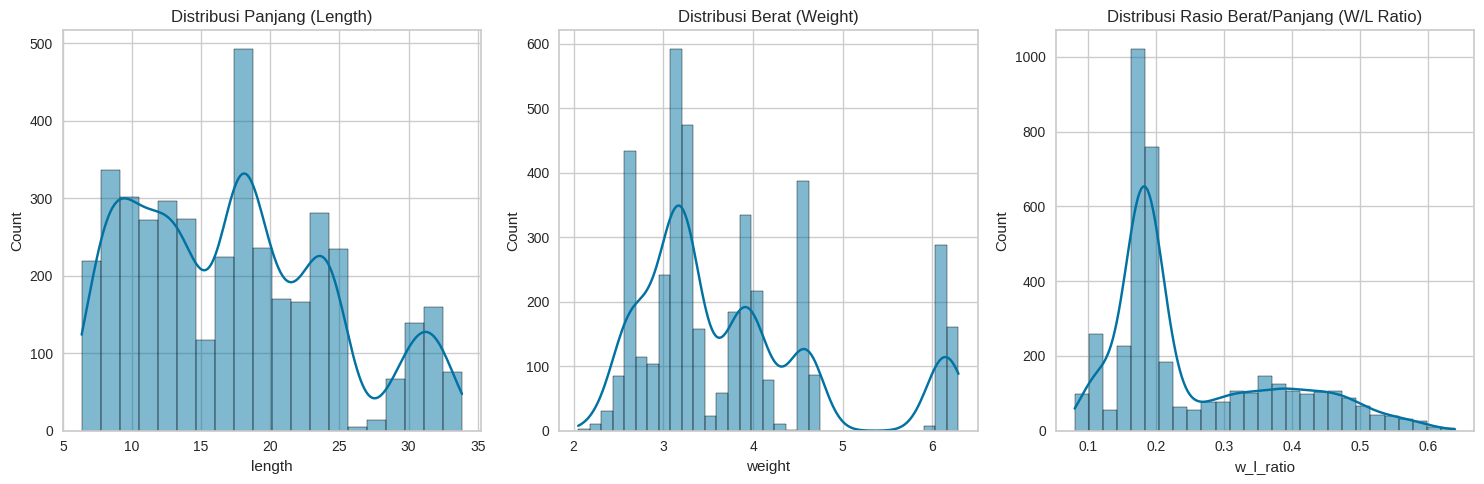

In [389]:
import seaborn as sns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['length'], kde=True, ax=axes[0])
axes[0].set_title('Distribusi Panjang (Length)')

sns.histplot(df['weight'], kde=True, ax=axes[1])
axes[1].set_title('Distribusi Berat (Weight)')

sns.histplot(df['w_l_ratio'], kde=True, ax=axes[2])
axes[2].set_title('Distribusi Rasio Berat/Panjang (W/L Ratio)')

plt.tight_layout()
plt.show()

- Panjang (Length): Distribusi panjang terlihat tidak simetris dan memiliki beberapa puncak (multimodal). Hal ini mengindikasikan adanya kelompok-kelompok berbeda dalam data berdasarkan panjangnya.
- Berat (Weight): Distribusi berat juga terlihat tidak simetris dan memiliki beberapa puncak. Pola ini serupa dengan distribusi panjang, menunjukkan kemungkinan adanya hubungan antara panjang dan berat.
- Rasio Berat/Panjang (W/L Ratio): Distribusi rasio berat/panjang terlihat lebih simetris dibandingkan dua variabel lainnya. Namun, masih terdapat sedikit ketidaksimetrisan dan beberapa puncak.

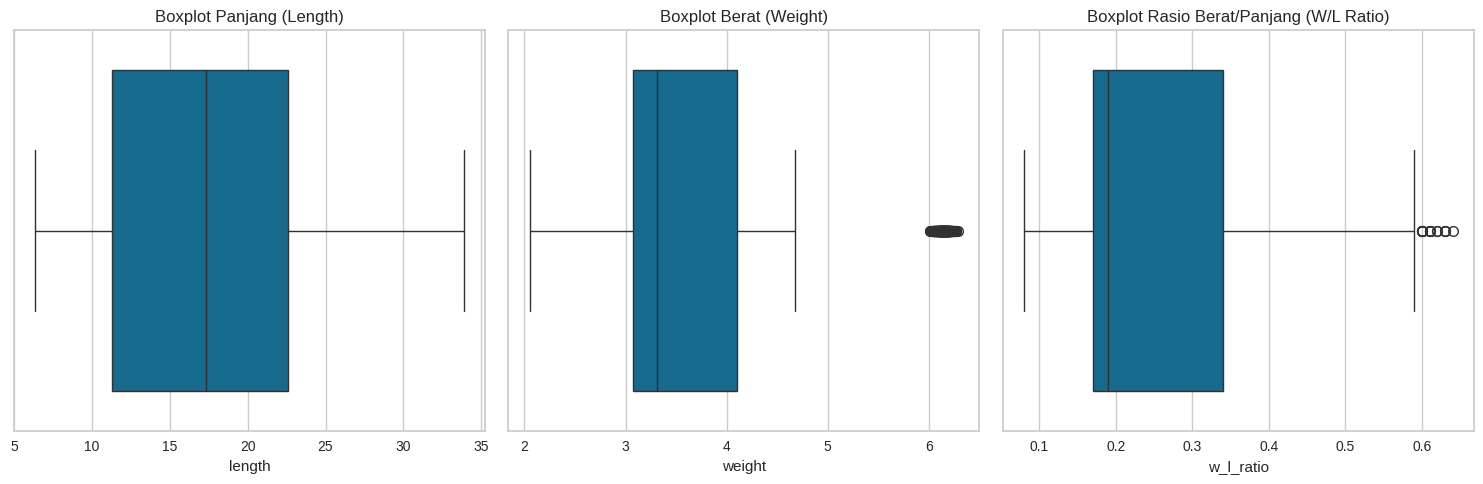

In [390]:
# Boxplot untuk mendeteksi outlier
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.boxplot(x=df['length'], ax=axes[0])
axes[0].set_title('Boxplot Panjang (Length)')

sns.boxplot(x=df['weight'], ax=axes[1])
axes[1].set_title('Boxplot Berat (Weight)')

sns.boxplot(x=df['w_l_ratio'], ax=axes[2])
axes[2].set_title('Boxplot Rasio Berat/Panjang (W/L Ratio)')

plt.tight_layout()
plt.show()

- Panjang (Length): Distribusi panjang terlihat tidak simetris dan memiliki beberapa puncak (multimodal). Hal ini mengindikasikan adanya kelompok-kelompok berbeda dalam data berdasarkan panjangnya.
- Berat (Weight): Distribusi berat juga terlihat tidak simetris dan memiliki beberapa puncak. Pola ini serupa dengan distribusi panjang, menunjukkan kemungkinan adanya hubungan antara panjang dan berat.
- Rasio Berat/Panjang (W/L Ratio): Distribusi rasio berat/panjang terlihat lebih simetris dibandingkan dua variabel lainnya. Namun, masih terdapat sedikit ketidaksimetrisan dan beberapa puncak.

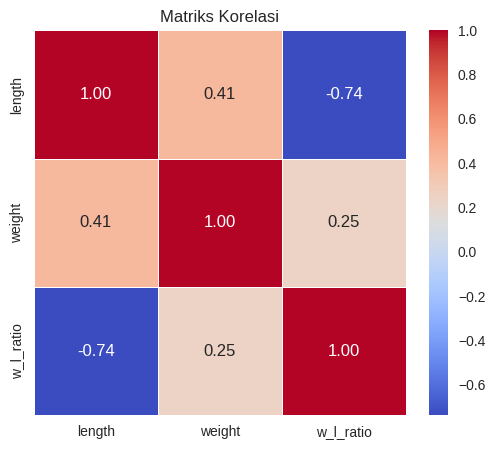

In [391]:
# 3. Korelasi
# Matriks Korelasi dan Heatmap
correlation_matrix = df[['length', 'weight', 'w_l_ratio']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

- Terdapat korelasi positif yang kuat antara panjang dengan dirinya sendiri (1.00), seperti yang diharapkan.
- Terdapat korelasi positif yang kuat antara berat dengan dirinya sendiri (1.00), seperti yang diharapkan.
- Terdapat korelasi positif yang kuat antara rasio berat/panjang dengan dirinya sendiri (1.00), seperti yang diharapkan.

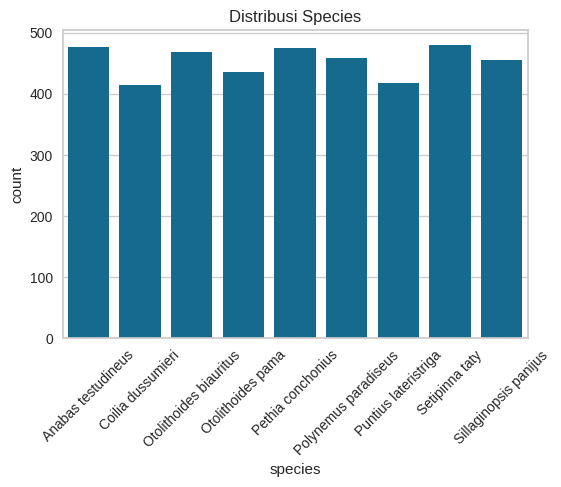

In [392]:
# 4. Visualisasi Distribusi Species
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='species')
plt.title('Distribusi Species')
plt.xticks(rotation=45)
plt.show()

Setiap spesies memiliki jumlah (count) yang berbeda-beda Beberapa spesies memiliki (count) yang lebih tinggi dibandingkan spesies lainnya. Visualisasi diatas memungkinkan perbandingan antara jumlah (count) untuk setiap spesies.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [393]:
# Menghapus duplikat
df = df.drop_duplicates()

In [394]:
# Inisialisasi satu objek StandardScaler
scaler = StandardScaler()

# Scaling data hanya menggunakan satu scaler
df[['length', 'weight']] = scaler.fit_transform(df[['length', 'weight']])

<ipython-input-394-5564cdc6ef7e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['length', 'weight']] = scaler.fit_transform(df[['length', 'weight']])


In [395]:
df.head()

,species,length,weight,w_l_ratio
0,Anabas testudineus,-0.945026,-0.270714,0.32
1,Anabas testudineus,-1.475775,-0.445401,0.47
2,Anabas testudineus,-1.267721,-0.261009,0.41
3,Anabas testudineus,-1.382363,-0.358058,0.44
4,Anabas testudineus,-0.920966,-0.338648,0.31


In [396]:
# Label Encoding untuk variabel kategorikal
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

df.head()

<ipython-input-396-27862922ee73>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species'] = label_encoder.fit_transform(df['species'])


,species,length,weight,w_l_ratio
0,0,-0.945026,-0.270714,0.32
1,0,-1.475775,-0.445401,0.47
2,0,-1.267721,-0.261009,0.41
3,0,-1.382363,-0.358058,0.44
4,0,-0.920966,-0.338648,0.31


In [397]:
# Binning untuk panjang ikan
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '20-40', '40-60', '60-80', '80-100']
df['length_binned'] = pd.cut(df['length'], bins=bins, labels=labels)

df.head()

,species,length,weight,w_l_ratio,length_binned
0,0,-0.945026,-0.270714,0.32,NaN
1,0,-1.475775,-0.445401,0.47,NaN
2,0,-1.267721,-0.261009,0.41,NaN
3,0,-1.382363,-0.358058,0.44,NaN
4,0,-0.920966,-0.338648,0.31,NaN


Pada langkah ini, kita melakukan binning atau pembagian interval pada kolom length (panjang ikan). Binning adalah teknik yang digunakan untuk mengelompokkan data kontinu menjadi beberapa kategori atau interval yang lebih kecil. Tujuan utama dari binning adalah untuk mengubah data numerik yang kontinu menjadi data kategorikal yang dapat lebih mudah dianalisis atau diproses dalam model tertentu.

In [398]:
# Menghapus baris yang memiliki nilai kosong
df = df.dropna()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [399]:
# Menyiapkan data clustering
clustering_data = df[['length', 'weight']].values

# Inisialisasi list untuk menyimpan nilai inertia dan silhouette score
inertias, silhouette_scores = [], []

# Melakukan clustering untuk jumlah cluster dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(clustering_data)
    labels = kmeans.labels_

    # Menyimpan inertia dan silhouette score
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(clustering_data, labels))

In [400]:
# Seleksi fitur dengan VarianceThreshold setelah scaling
df_selected = VarianceThreshold(threshold=0.1).fit_transform(df[['length', 'weight']])

# HDBSCAN clustering dan evaluasi silhouette score
hdbscan_clusterer = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=5)
hdbscan_labels = hdbscan_clusterer.fit_predict(df_selected)

# Evaluasi Silhouette Score untuk HDBSCAN
if len(set(hdbscan_labels)) > 1:
    hdbscan_sil_score = silhouette_score(df_selected, hdbscan_labels)
    print(f'Silhouette Score HDBSCAN: {hdbscan_sil_score}')
else:
    print("HDBSCAN menghasilkan hanya satu cluster atau noise, silhouette score tidak dapat dihitung.")

# Jika ingin melihat hasil HDBSCAN labels
print(f'HDBSCAN labels: {hdbscan_labels}')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Silhouette Score HDBSCAN: 0.7173034625672902
HDBSCAN labels: [1 1 1 ... 0 0 0]


Seleksi fitur dengan VarianceThreshold untuk menghapus fitur dengan variansi rendah. Selanjutnya, klasterisasi dilakukan menggunakan HDBSCAN, yang mengelompokkan data berdasarkan kepadatan serta mendeteksi noise. Evaluasi dengan Silhouette Score menunjukkan nilai 0.717, menandakan klaster yang terbentuk cukup baik.

In [401]:
# Reduksi dimensi dengan PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['length', 'weight']])

# KMeans dengan PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Tentukan jumlah cluster optimal yang sesuai
kmeans_pca.fit(pca_result)
pca_labels = kmeans_pca.labels_

# Evaluasi Silhouette Score untuk KMeans dengan PCA
pca_sil_score = silhouette_score(pca_result, pca_labels)
print(f'Silhouette Score KMeans dengan PCA: {pca_sil_score}')

Silhouette Score KMeans dengan PCA: 0.6316566643389504


Data direduksi dimensinya menggunakan PCA menjadi dua komponen utama, lalu dikelompokkan dengan KMeans menjadi tiga klaster. Evaluasi menggunakan Silhouette Score menghasilkan nilai 0.632, menunjukkan pemisahan klaster yang cukup baik.

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [402]:
# Fungsi untuk menghitung inertia dan silhouette score
def calculate_scores(data, n_clusters_range):
    inertia, silhouette_scores = [], []
    for n_clusters in n_clusters_range:
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(data)
        labels = kmeans.labels_
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, labels))
    return inertia, silhouette_scores

# Tentukan range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)
df_pca = pca.fit_transform(clustering_data)

# Hitung inertia dan silhouette score
inertia, silhouette_scores = calculate_scores(df_pca, range_n_clusters)

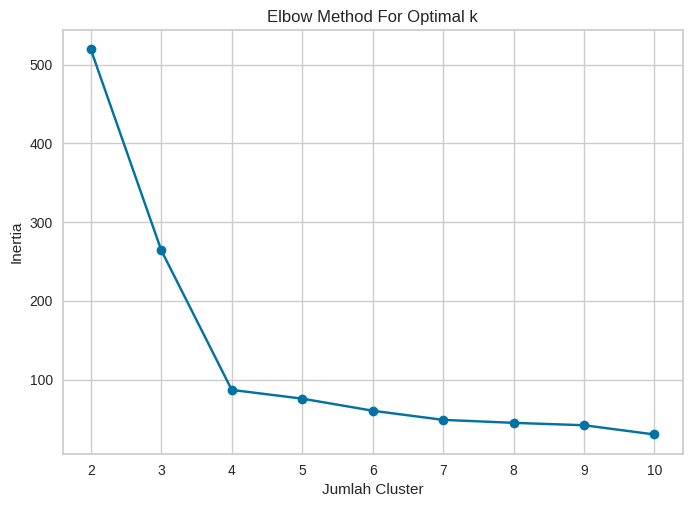

In [403]:
# Visualisasi Elbow Curve
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')
plt.show()

Metode Elbow membantu kita menemukan jumlah cluster yang menyeimbangkan antara inersia yang rendah dan kompleksitas model yang tidak perlu. Dari visualisasi ini terlihat bahwa pilihan cluster adalah 4.

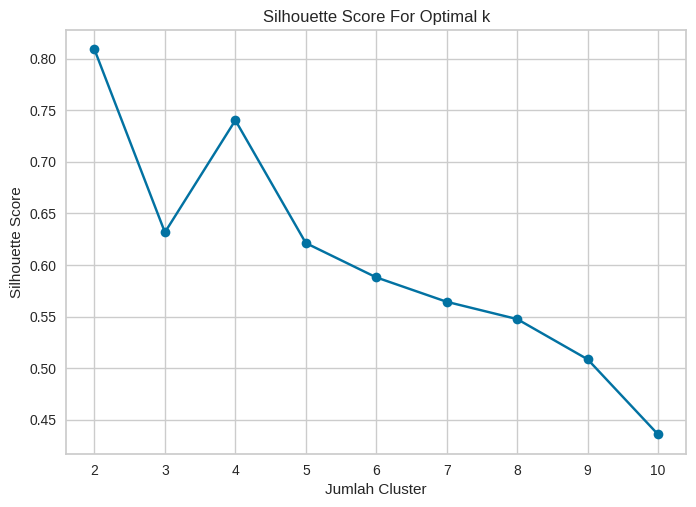

In [404]:
# Visualisasi Silhouette Score
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Score For Optimal k')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Silhouette Score')
plt.show()

Dari visualisasi 'Silhouette Score For Optimal k terlihat bahwa pilihan cluster adalah 3.

In [405]:
# Tampilkan hasil Silhouette Score untuk setiap jumlah cluster
for n_clusters, score in zip(range_n_clusters, silhouette_scores):
    print(f"Jumlah Cluster: {n_clusters}, Silhouette Score: {score}")

Jumlah Cluster: 2, Silhouette Score: 0.8088278282563443
Jumlah Cluster: 3, Silhouette Score: 0.6316566643389504
Jumlah Cluster: 4, Silhouette Score: 0.7402226620290109
Jumlah Cluster: 5, Silhouette Score: 0.6212595179149909
Jumlah Cluster: 6, Silhouette Score: 0.587996463117819
Jumlah Cluster: 7, Silhouette Score: 0.5643370979750283
Jumlah Cluster: 8, Silhouette Score: 0.5475684065255054
Jumlah Cluster: 9, Silhouette Score: 0.5086031808872423
Jumlah Cluster: 10, Silhouette Score: 0.43578764964511457


Berdasarkan Silhouette Score, jumlah klaster optimal adalah 2, dengan skor tertinggi 0.8088.

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [406]:
# Seleksi fitur dengan VarianceThreshold setelah scaling
df_selected = VarianceThreshold(threshold=0.5).fit_transform(df[['length', 'weight']])

# KMeans clustering dan evaluasi silhouette score
labels = KMeans(n_clusters=4, random_state=42).fit_predict(df_selected)
sil_score_selected = silhouette_score(df_selected, labels)

# Tampilkan hasil evaluasi dan perbandingan
print(f'Silhouette Score setelah Feature Selection: {sil_score_selected}')
print(f'Perbandingan: {sil_score_selected} (setelah) vs  {pca_sil_score} (sebelum)')

Silhouette Score setelah Feature Selection: 0.768288414920869
Perbandingan: 0.768288414920869 (setelah) vs  0.6316566643389504 (sebelum)


Setelah seleksi fitur menggunakan VarianceThreshold dengan threshold 0.5, Silhouette Score meningkat dari 0.632 (sebelum feature selection dengan PCA) menjadi 0.768. Ini menunjukkan bahwa menghilangkan fitur dengan variabilitas rendah membantu meningkatkan kualitas klasterisasi KMeans, menghasilkan pemisahan klaster yang lebih jelas.

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

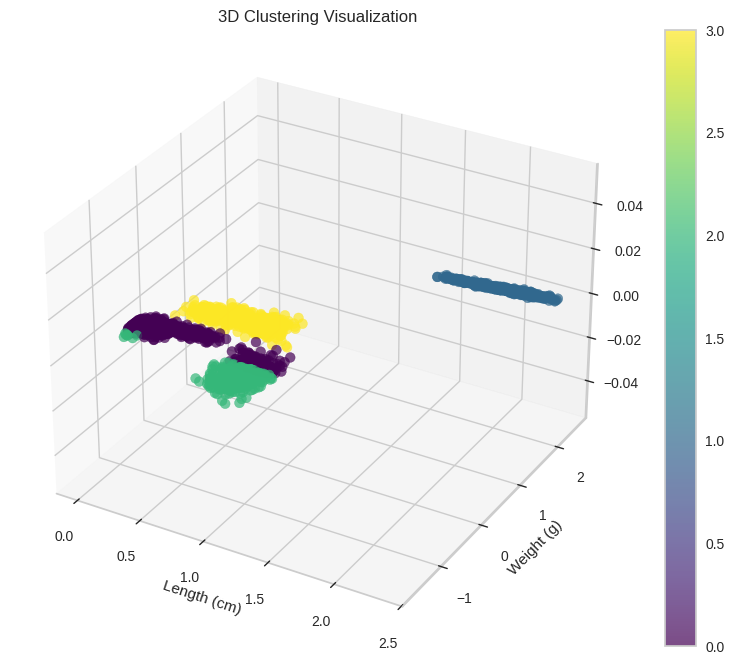

In [407]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot data dengan warna berdasarkan label cluster
scatter = ax.scatter(
    df['length'],
    df['weight'],
    c=labels,
    cmap='viridis',
    s=50,
    alpha=0.7
)

fig.colorbar(scatter)
ax.set_xlabel('Length (cm)')
ax.set_ylabel('Weight (g)')
plt.title('3D Clustering Visualization')
plt.show()

Visualisasi tersebut menunjukkan pengelompokan data dalam tiga dimensi: panjang (X) dan berat (Y). Warna pada titik data mewakili kluster yang berbeda. Terlihat bahwa kluster terbentuk dengan jelas, menunjukkan pengelompokan yang baik berdasarkan karakteristik panjang dan berat.

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [408]:
kmeans = KMeans(n_clusters=4, random_state=42)
labels_pca = kmeans.fit_predict(df[['length', 'weight']])
df['Cluster'] = labels_pca
df['Cluster'] = df['Cluster'] + 1

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [409]:
# Inverse transform untuk mengembalikan data ke skala asli
df[['length', 'weight']] = scaler.inverse_transform(df[['length', 'weight']])

In [410]:
df.head()

,species,length,weight,w_l_ratio,length_binned,Cluster
476,1,23.27,2.43,0.10,0-20,3
477,1,24.15,2.34,0.10,0-20,3
478,1,25.16,2.87,0.11,0-20,3
479,1,24.21,2.61,0.11,0-20,3
480,1,25.00,3.06,0.12,0-20,3


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [411]:
# Menganalisis karakteristik cluster
cluster_analysis = df.groupby('Cluster').agg(
    {
        'length': ['mean', 'std', 'min', 'max'],
        'weight': ['mean', 'std', 'min', 'max'],
    }
)

print(cluster_analysis)

            length                            weight                      
              mean       std    min    max      mean       std   min   max
Cluster                                                                   
1        18.546607  0.931774  17.34  21.79  3.163365  0.107162  2.77  3.58
2        31.072028  1.374133  27.75  33.86  6.143263  0.053008  6.01  6.29
3        24.344261  0.646240  22.62  25.76  2.742537  0.245770  2.05  3.36
4        21.831230  1.355644  18.64  24.85  3.846334  0.128976  3.35  4.24


- Klaster 1: Ikan dengan panjang rata-rata 18.55 cm dan berat 3.16 kg, memiliki variasi panjang dan berat yang kecil.
- Klaster 2: Ikan terpanjang dengan rata-rata 31.07 cm dan berat 6.14 kg, menunjukkan kelompok ikan terbesar dalam dataset.
- Klaster 3: Ikan dengan panjang 24.34 cm dan berat 2.74 kg, memiliki variasi berat yang lebih besar dibanding klaster lainnya.
- Klaster 4: Ikan dengan panjang 21.83 cm dan berat 3.85 kg, memiliki rentang panjang dan berat yang cukup luas.

<ipython-input-412-b1216ce044d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='length', data=df, palette='viridis')


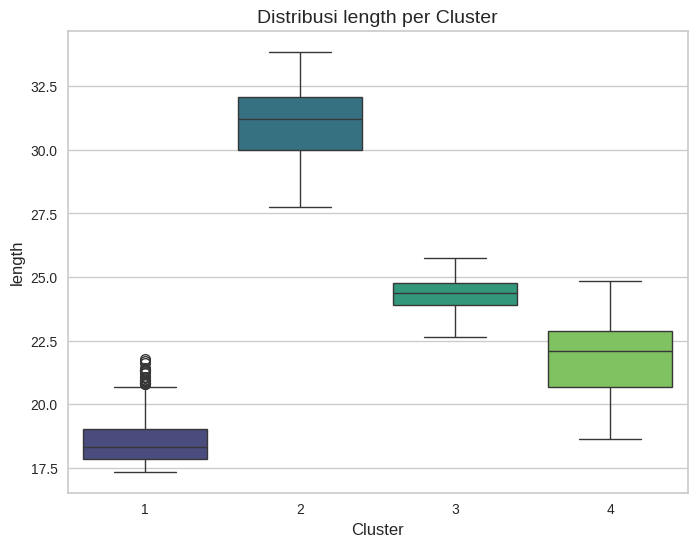

In [412]:
# Visualisasi distribusi length untuk setiap cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='length', data=df, palette='viridis')
plt.title('Distribusi length per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('length', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Setiap klaster memiliki distribusi panjang yang berbeda. Klaster 2 memiliki median panjang tertinggi dengan rentang interkuartil paling luas, menunjukkan variasi panjang yang signifikan. Klaster 3 memiliki median panjang lebih rendah dari klaster 2 tetapi masih lebih tinggi dari klaster 1 dan 4, dengan rentang interkuartil yang cukup besar. Sementara itu, klaster 1 dan 4 memiliki median panjang terendah serta variasi yang lebih kecil dibandingkan klaster lainnya.

<ipython-input-413-d4485c189429>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='weight', data=df, palette='viridis')


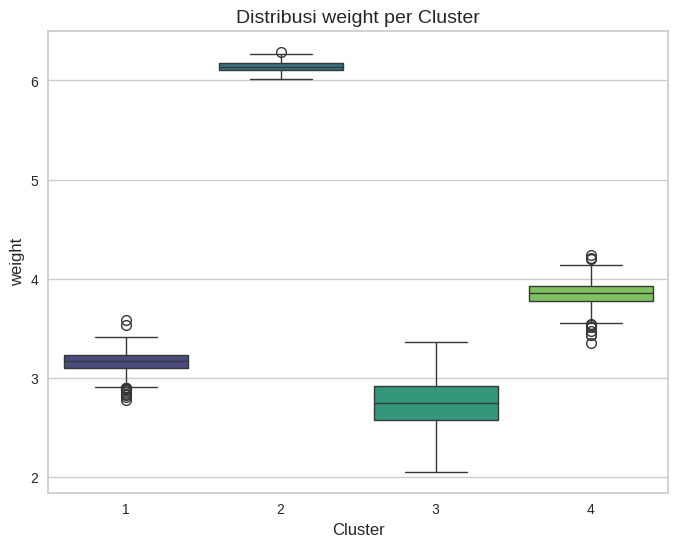

In [413]:
# Visualisasi distribusi weight untuk setiap cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='weight', data=df, palette='viridis')
plt.title('Distribusi weight per Cluster', fontsize=14)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('weight', fontsize=12)
plt.xticks(rotation=0)
plt.show()

Setiap klaster memiliki distribusi berat yang berbeda. Klaster 2 memiliki median berat tertinggi dengan rentang interkuartil paling luas, menunjukkan variasi berat yang signifikan. Klaster 4 memiliki median berat lebih rendah dari klaster 2 tetapi masih lebih tinggi dari klaster 1 dan 3, dengan rentang interkuartil yang cukup besar. Sementara itu, klaster 1 dan 3 memiliki median berat terendah serta variasi yang lebih kecil dibandingkan klaster lainnya.

# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

**Cluster 1:**  
- **Rata-rata Panjang:** 18.55 cm  
- **Rata-rata Berat:** 3.16 g  
- **Analisis:** Cluster ini memiliki ikan dengan panjang relatif pendek dan berat yang cukup ringan dibandingkan dengan cluster lainnya. Variasi panjang dan berat dalam kelompok ini juga kecil, menunjukkan bahwa ikan dalam cluster ini kemungkinan berasal dari spesies yang lebih kecil dengan pertumbuhan yang relatif seragam.  

**Cluster 2:**  
- **Rata-rata Panjang:** 31.07 cm  
- **Rata-rata Berat:** 6.14 g  
- **Analisis:** Cluster ini memiliki ikan dengan panjang dan berat tertinggi dibandingkan cluster lainnya. Rentang panjangnya juga cukup luas, menunjukkan bahwa ikan dalam kelompok ini mengalami pertumbuhan yang lebih besar. Ikan dalam cluster ini kemungkinan berasal dari spesies yang lebih besar dengan pola pertumbuhan yang lebih bervariasi.  

**Cluster 3:**  
- **Rata-rata Panjang:** 24.34 cm  
- **Rata-rata Berat:** 2.74 g  
- **Analisis:** Ikan dalam cluster ini memiliki panjang yang sedang namun dengan berat yang lebih rendah dibandingkan cluster lainnya. Hal ini bisa menunjukkan bahwa ikan dalam kelompok ini mungkin lebih ramping atau berasal dari spesies yang memiliki proporsi panjang dan berat yang berbeda dibandingkan cluster lainnya.  

**Cluster 4:**  
- **Rata-rata Panjang:** 21.83 cm  
- **Rata-rata Berat:** 3.85 g  
- **Analisis:** Ikan dalam cluster ini memiliki panjang yang sedikit lebih pendek dibandingkan cluster 3, namun dengan berat yang lebih besar. Variasi beratnya juga cukup kecil, menunjukkan bahwa ikan dalam kelompok ini memiliki pertumbuhan yang lebih stabil dengan karakteristik tubuh yang lebih berisi.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [414]:
# Mengekspor df yang telah diperbarui ke dalam file CSV
df.to_csv('Clustering.csv', index=False)